In [129]:
!pip install yfinance
!pip install beautifulsoup4
!pip install nbformat
!pip install requests
!pip install plotly dash

In [130]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [131]:
#Using the Ticker function enter the ticker symbol of the stock we want to extract data 
tesla = yf.Ticker('TSLA')
#Using the ticker object and the function history extract stock information and max so we get information for the maximum amount of time.
tesla_data = tesla.history(period="max")
#Reset the index 
tesla_data.reset_index(inplace=True)
# dataframe using the head function
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


#Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [166]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2:
                continue
            Date = col[0].text.strip()
            Revenue = col[1].text.replace("$", "").replace(",", "")
            if Revenue:  # Check if Revenue is not an empty string
                tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [Date], "Revenue": [Revenue]})], ignore_index=True)

# Convert 'Revenue' column to float, handling empty strings
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Drop rows with NaN values in 'Revenue' column
tesla_revenue.dropna(subset=['Revenue'], inplace=True)

tesla_revenue.tail()


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27


Question 3 - Extracting GameStop Stock Data Using yfinance

In [155]:
##Using the Ticker function enter the ticker symbol of the stock we want to extract data 
gme = yf.Ticker("GME")
#Using the ticker object and the function history extract stock information and max so we get information for the maximum amount of time.
gme_data = gme.history(period="max")
#Reset the index using the reset_index(inplace=True)
gme_data.reset_index(inplace=True)
#display the first five rows of the gme_data dataframe using the head
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [134]:
#Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [171]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
gme_revenue  = pd.DataFrame(columns=["Date", "Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2:
                continue
            Date = col[0].text.strip()
            Revenue = col[1].text.replace("$", "").replace(",", "")
            if Revenue:  # Check if Revenue is not an empty string
                gme_revenue  = pd.concat([gme_revenue , pd.DataFrame({"Date": [Date], "Revenue": [Revenue]})], ignore_index=True)

# Convert 'Revenue' column to float, handling empty strings
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Drop rows with NaN values in 'Revenue' column
gme_revenue.dropna(subset=['Revenue'], inplace=True)

gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


#Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

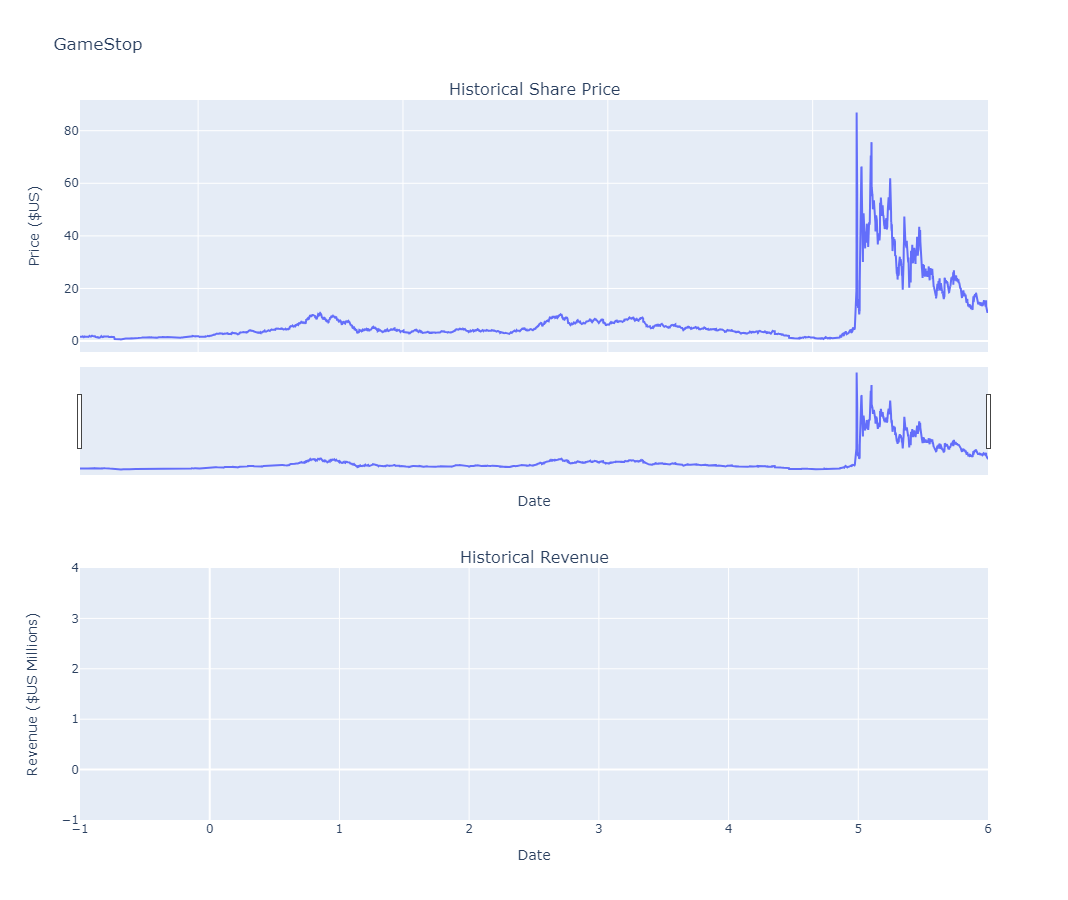

In [152]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2024-04-15']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2024-04-15']
    
    stock_dates = np.array(pd.to_datetime(stock_data_specific.Date))
    revenue_dates = np.array(pd.to_datetime(revenue_data_specific.Date))
    
    fig.add_trace(go.Scatter(x=stock_dates, y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_dates, y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

make_graph(gme_data, gme_revenue, 'GameStop')

#Question 6 - GameStop Stock and Revenue Dashboard

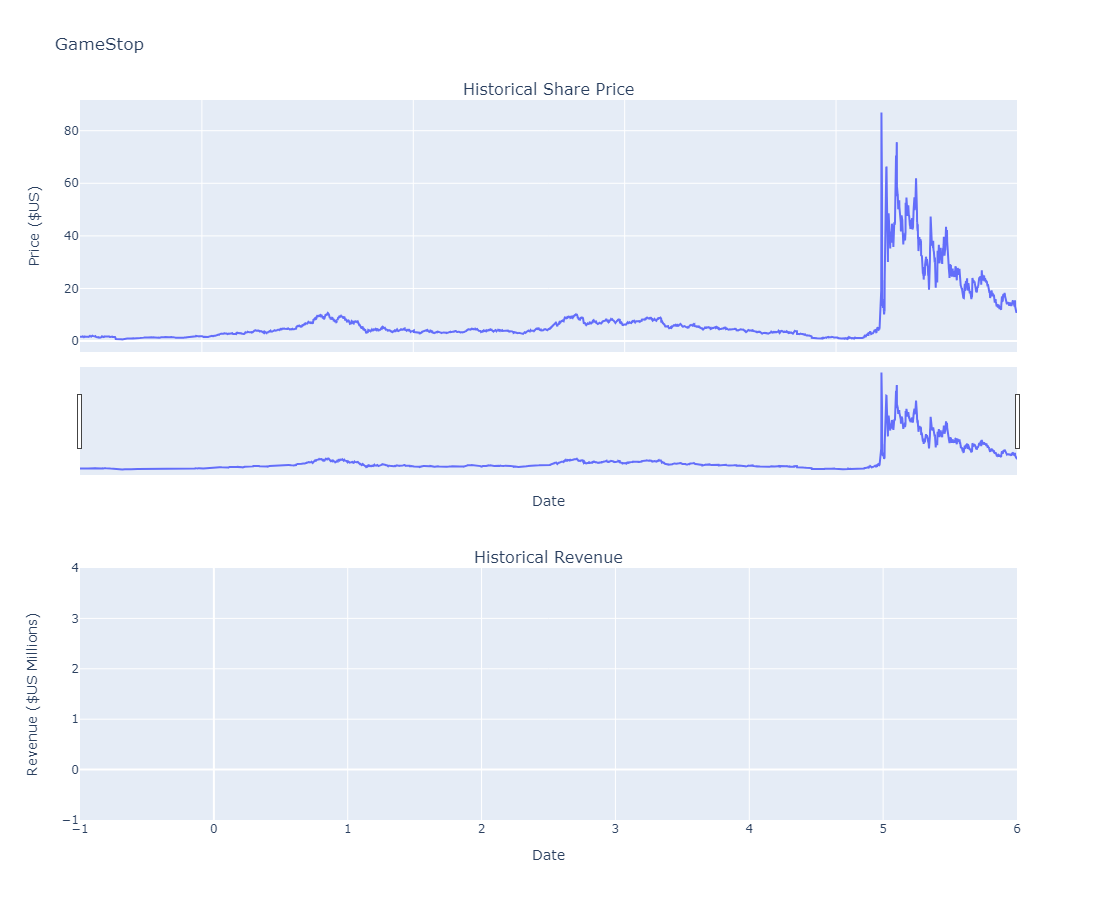

In [145]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2024-04-15']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2024-04-15']
    
    stock_dates = np.array(pd.to_datetime(stock_data_specific.Date))
    revenue_dates = np.array(pd.to_datetime(revenue_data_specific.Date))
    
    fig.add_trace(go.Scatter(x=stock_dates, y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_dates, y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
make_graph(gme_data, gme_revenue, 'GameStop')

#About the Authors:
Greetings! I'm Manish Thapa, a seasoned Software Engineer and Blockchain Developer with a passion for pushing the boundaries of what technology can achieve. 